In [1]:
pip install plotly_express

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
placement = pd.read_csv("PlacementDataset.csv")
 

In [4]:
placement.head()


sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0

In [5]:
placement_copy=placement.copy()

In [6]:
placement_copy.shape

(215, 15)

In [7]:
placement_copy.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

## NAN Handling

In [8]:
placement_copy.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [9]:
placement_copy['salary'].fillna(value=0 , inplace = True )

In [10]:
placement_copy.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [11]:
placement_copy.drop(['sl_no','ssc_b','hsc_b'], axis = 1 , inplace = True)

In [12]:
placement_copy.head()

gender  ssc_p  hsc_p     hsc_s  degree_p   degree_t workex  etest_p  \
0      M  67.00  91.00  Commerce     58.00   Sci&Tech     No     55.0   
1      M  79.33  78.33   Science     77.48   Sci&Tech    Yes     86.5   
2      M  65.00  68.00      Arts     64.00  Comm&Mgmt     No     75.0   
3      M  56.00  52.00   Science     52.00   Sci&Tech     No     66.0   
4      M  85.80  73.60  Commerce     73.30  Comm&Mgmt     No     96.8   

  specialisation  mba_p      status    salary  
0         Mkt&HR  58.80      Placed  270000.0  
1        Mkt&Fin  66.28      Placed  200000.0  
2        Mkt&Fin  57.80      Placed  250000.0  
3         Mkt&HR  59.43  Not Placed       0.0  
4        Mkt&Fin  55.50      Placed  425000.0

## Outlier Handling

Text(0.5, 1.0, 'Employability Percentage')

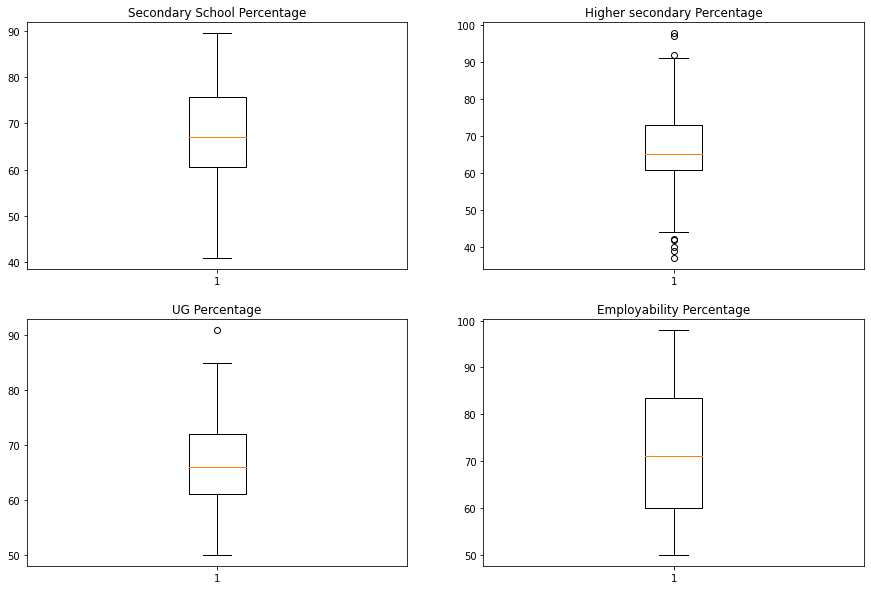

In [13]:
plt.figure(figsize = (15,10))

ax = plt.subplot(221)
plt.boxplot(placement_copy['ssc_p'])
ax.set_title('Secondary School Percentage')

ax = plt.subplot(222)
plt.boxplot(placement_copy['hsc_p'])
ax.set_title('Higher secondary Percentage')

ax = plt.subplot(223)
plt.boxplot(placement_copy['degree_p'])
ax.set_title('UG Percentage')

ax = plt.subplot(224)
plt.boxplot(placement_copy['etest_p'])
ax.set_title('Employability Percentage')

In [14]:
Q1 = placement_copy['hsc_p'].quantile(0.25)
Q3 = placement_copy['hsc_p'].quantile(0.75)
IQR = Q3 - Q1

filter = (placement_copy['hsc_p'] >= Q1 - 1.5 * IQR) & (placement_copy['hsc_p']<= Q3+ 1.5*IQR)
placement_filtered= placement_copy.loc[filter]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd4bd4ce430>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd4bd4ce9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd4bd4ce160>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd4bd4cef70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd4bd4db280>],
 'means': []}

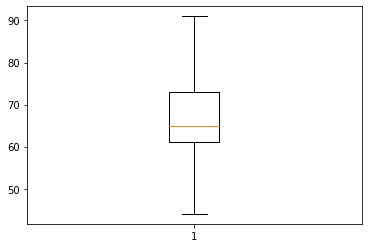

In [15]:
plt.boxplot(placement_filtered['hsc_p'])

## Data Visualization

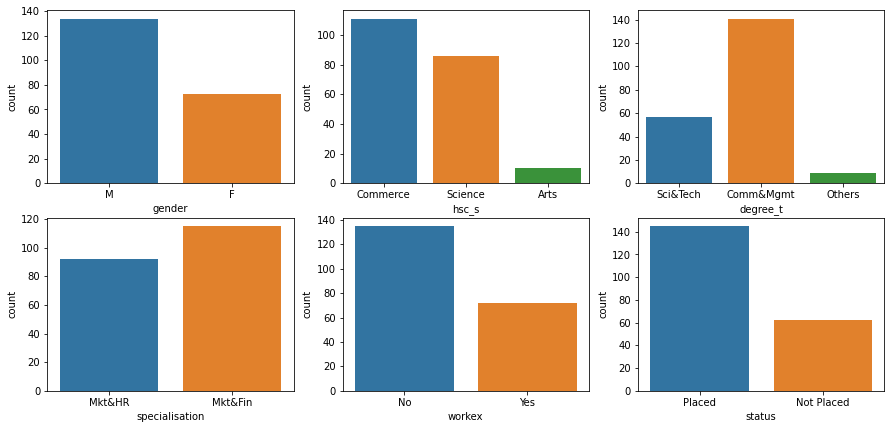

In [16]:
plt.figure(figsize = (15,7))

plt.subplot(231)
ax = sns.countplot(x= 'gender' , data = placement_filtered)

plt.subplot(232)
ax = sns.countplot(x= 'hsc_s' , data = placement_filtered)

plt.subplot(233)
ax = sns.countplot(x= 'degree_t' , data = placement_filtered)

plt.subplot(234)
ax = sns.countplot(x= 'specialisation' , data = placement_filtered)

plt.subplot(235)
ax = sns.countplot(x= 'workex' , data = placement_filtered)

plt.subplot(236)
ax = sns.countplot(x= 'status' , data = placement_filtered)


<AxesSubplot:xlabel='gender', ylabel='count'>

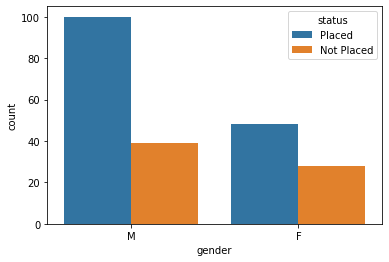

In [17]:
sns.countplot(x='gender', hue='status',data=placement)


/home/sharthak/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'SSC %')

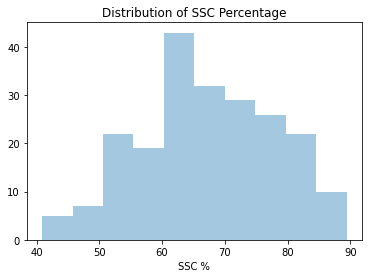

In [18]:
sns.distplot(placement['ssc_p'], kde=False)
plt.title('Distribution of SSC Percentage')
plt.xlabel('SSC %')

Text(10.049999999999997, 0.5, 'SSC %')

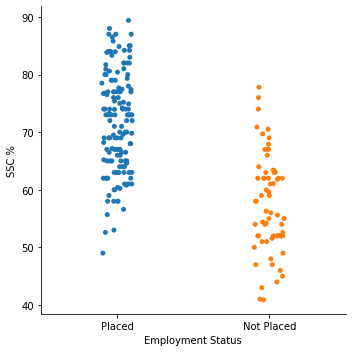

In [19]:
sns.catplot(y='ssc_p', x='status', data=placement)
plt.xlabel('Employment Status')
plt.ylabel('SSC %')

/home/sharthak/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'HSC %')

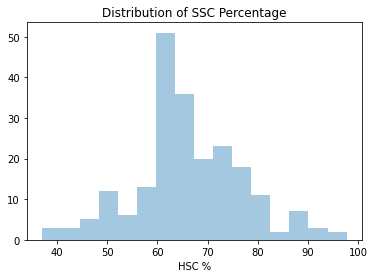

In [20]:
sns.distplot(placement['hsc_p'], kde=False)
plt.title('Distribution of SSC Percentage')
plt.xlabel('HSC %')

Text(3.674999999999997, 0.5, 'HSC %')

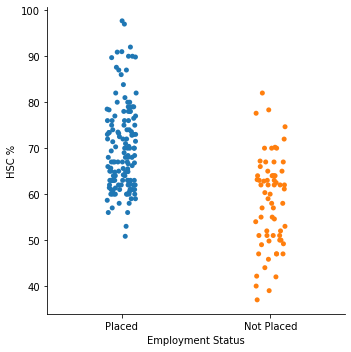

In [21]:
sns.catplot(y='hsc_p', x='status', data=placement)
plt.xlabel('Employment Status')
plt.ylabel('HSC %')


<AxesSubplot:xlabel='hsc_s', ylabel='count'>

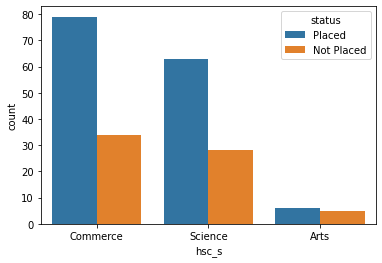

In [22]:
sns.countplot(x='hsc_s', hue='status', data=placement)

/home/sharthak/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Degree %')

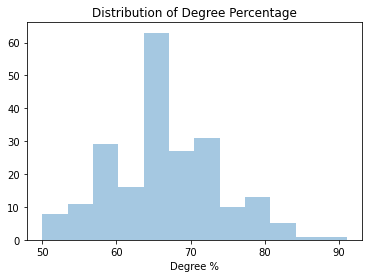

In [23]:
sns.distplot(placement['degree_p'], kde=False)
plt.title('Distribution of Degree Percentage')
plt.xlabel('Degree %')

Text(10.049999999999997, 0.5, 'Degree %')

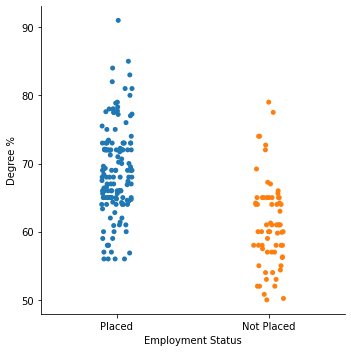

In [24]:
sns.catplot(y='degree_p', x='status', data=placement)
plt.xlabel('Employment Status')
plt.ylabel('Degree %')

<AxesSubplot:xlabel='degree_t', ylabel='count'>

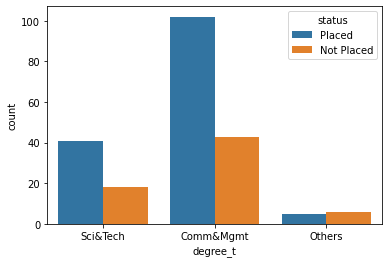

In [25]:
sns.countplot(x='degree_t', hue='status', data=placement)

<AxesSubplot:xlabel='workex', ylabel='count'>

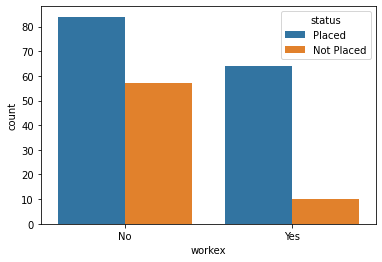

In [26]:
sns.countplot(x='workex', hue='status', data=placement)

/home/sharthak/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Employment Test %')

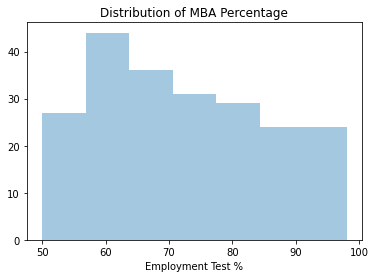

In [27]:
sns.distplot(placement['etest_p'], kde=False)
plt.title('Distribution of MBA Percentage')
plt.xlabel('Employment Test %')

Text(3.674999999999997, 0.5, 'Employment Test %')

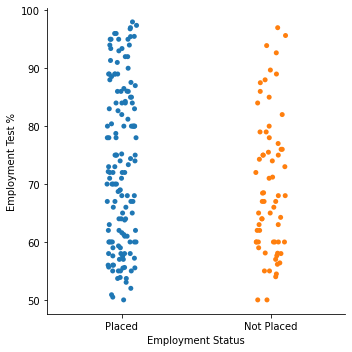

In [28]:

sns.catplot(y='etest_p', x='status', data=placement)
plt.xlabel('Employment Status')
plt.ylabel('Employment Test %')

Text(0.5, 0, 'MBA Specialization')

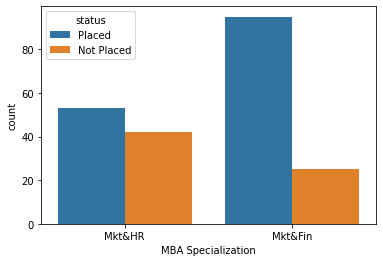

In [29]:
sns.countplot(x='specialisation', hue='status', data=placement)
plt.xlabel('MBA Specialization')

/home/sharthak/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'MBA %')

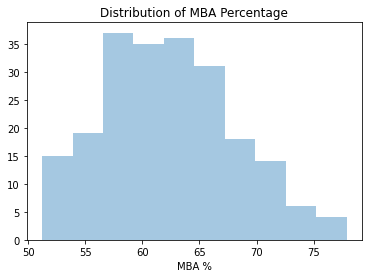

In [30]:
sns.distplot(placement['mba_p'], kde=False)
plt.title('Distribution of MBA Percentage')
plt.xlabel('MBA %')

Text(10.049999999999997, 0.5, 'MBA %')

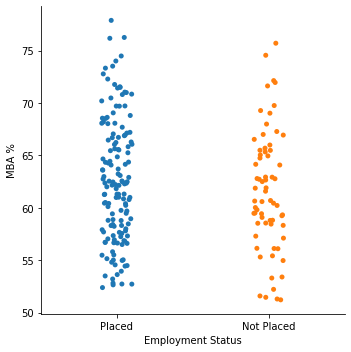

In [31]:
sns.catplot(y='mba_p', x='status', data=placement)
plt.xlabel('Employment Status')
plt.ylabel('MBA %')

/home/sharthak/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Salary')

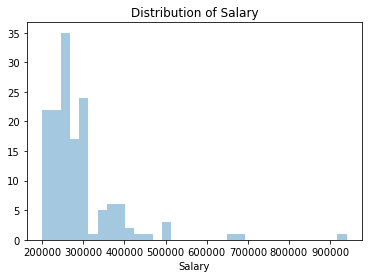

In [32]:
sns.distplot(placement['salary'], kde=False)
plt.title('Distribution of Salary')
plt.xlabel('Salary')

Text(-15.450000000000003, 0.5, 'Salary')

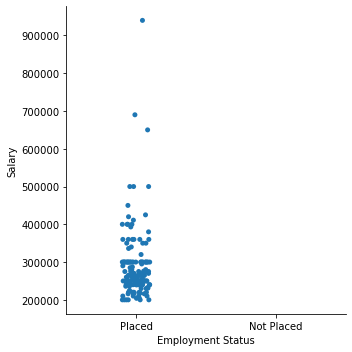

In [33]:
sns.catplot(y='salary', x='status', data=placement)
plt.xlabel('Employment Status')
plt.ylabel('Salary')

## corelation between features


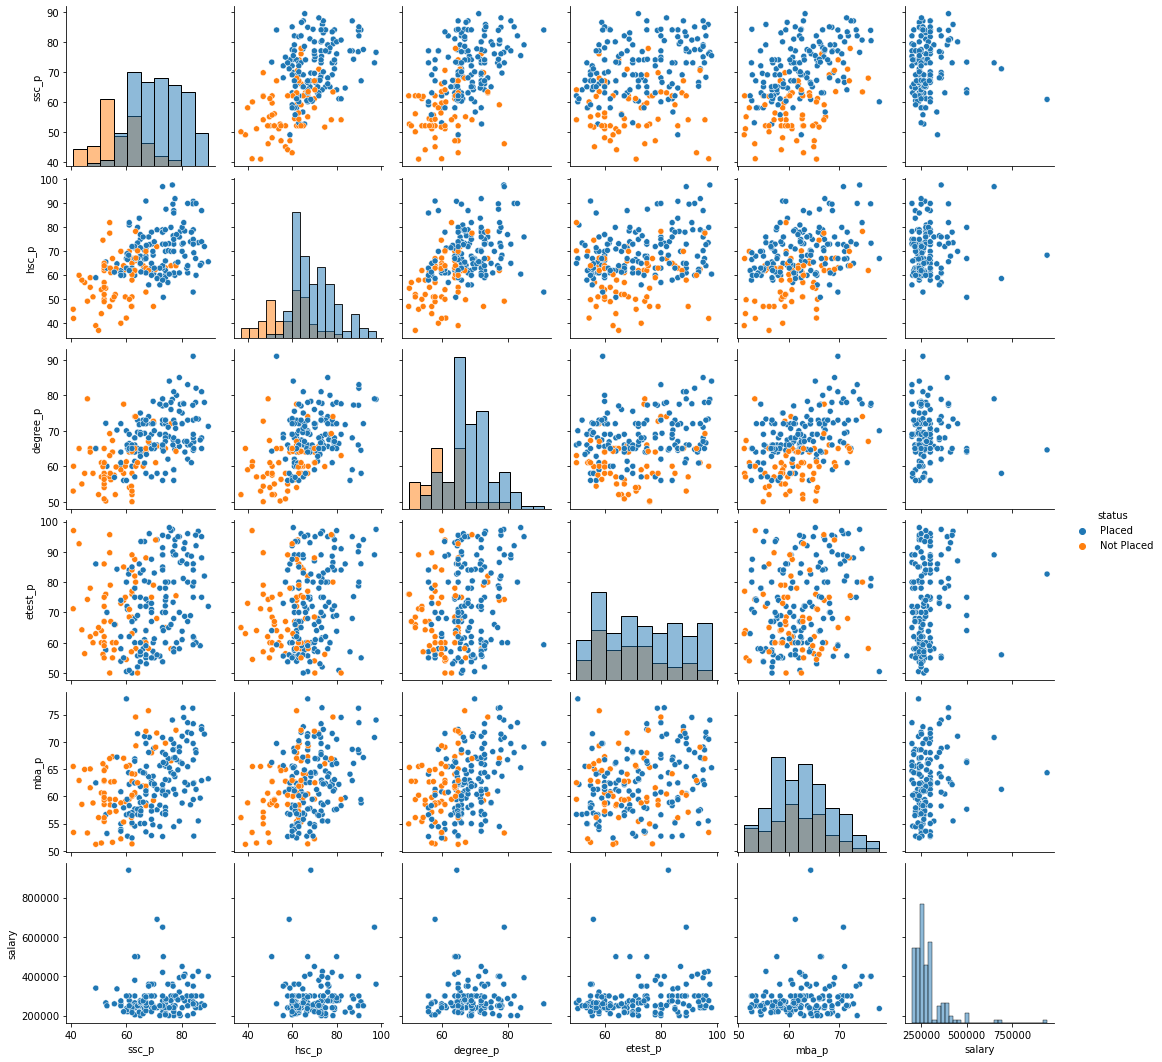

In [34]:
sns.pairplot(data=placement[['ssc_p','hsc_p','degree_p', 'etest_p','mba_p','salary',
                             'status']], hue="status", diag_kind='hist')

/home/sharthak/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

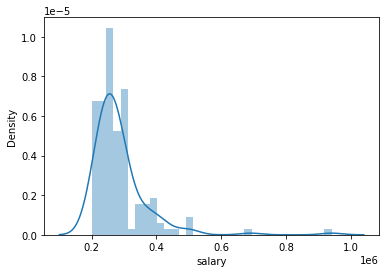

In [35]:
placement_placed = placement_filtered[placement_filtered.salary!= 0]
sns.distplot(placement_placed['salary'])

In [36]:
import plotly_express as px
px.violin(placement_placed,y='salary',x='specialisation',color='gender',box=True,points='all')

## Encoding

In [37]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

object_cols= ['gender','workex','specialisation','status']

label_encoder = LabelEncoder()

for col in object_cols:
    placement_filtered[col]= label_encoder.fit_transform(placement_filtered[col])
    
placement_filtered.head(10)


/tmp/ipykernel_8707/4030247267.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



gender  ssc_p  hsc_p     hsc_s  degree_p   degree_t  workex  etest_p  \
0       1  67.00  91.00  Commerce     58.00   Sci&Tech       0    55.00   
1       1  79.33  78.33   Science     77.48   Sci&Tech       1    86.50   
2       1  65.00  68.00      Arts     64.00  Comm&Mgmt       0    75.00   
3       1  56.00  52.00   Science     52.00   Sci&Tech       0    66.00   
4       1  85.80  73.60  Commerce     73.30  Comm&Mgmt       0    96.80   
5       1  55.00  49.80   Science     67.25   Sci&Tech       1    55.00   
6       0  46.00  49.20  Commerce     79.00  Comm&Mgmt       0    74.28   
7       1  82.00  64.00   Science     66.00   Sci&Tech       1    67.00   
8       1  73.00  79.00  Commerce     72.00  Comm&Mgmt       0    91.34   
9       1  58.00  70.00  Commerce     61.00  Comm&Mgmt       0    54.00   

   specialisation  mba_p  status    salary  
0               1  58.80       1  270000.0  
1               0  66.28       1  200000.0  
2               0  57.80       1  250000.0  
3               1  59.43       0       0.0  
4               0  55.50       1  425000.0  
5               0  51.58       0       0.0  
6               0  53.29       0       0.0  
7               0  62.14       1  252000.0  
8               0  61.29       1  231000.0  
9               0  52.21       0       0.0

In [38]:
# One Hot Encoding 
1,67,91,58,0,55,1,58.80
dummy_hsc_s = pd.get_dummies(placement_filtered['hsc_s'], prefix = 'dummy')
dummy_degree_t = pd.get_dummies(placement_filtered['degree_t'], prefix = 'dummy')

placement_coded = pd.concat([placement_filtered , dummy_hsc_s , dummy_degree_t],axis = 1)
placement_coded.drop(['hsc_s','degree_t','salary'],axis = 1 , inplace = True)
placement_coded.head()

gender  ssc_p  hsc_p  degree_p  workex  etest_p  specialisation  mba_p  \
0       1  67.00  91.00     58.00       0     55.0               1  58.80   
1       1  79.33  78.33     77.48       1     86.5               0  66.28   
2       1  65.00  68.00     64.00       0     75.0               0  57.80   
3       1  56.00  52.00     52.00       0     66.0               1  59.43   
4       1  85.80  73.60     73.30       0     96.8               0  55.50   

   status  dummy_Arts  dummy_Commerce  dummy_Science  dummy_Comm&Mgmt  \
0       1           0               1              0                0   
1       1           0               0              1                0   
2       1           1               0              0                1   
3       0           0               0              1                0   
4       1           0               1              0                1   

   dummy_Others  dummy_Sci&Tech  
0             0               1  
1             0               1  
2             0               0  
3             0               1  
4             0               0

In [64]:
placement_coded.head(30)

gender  ssc_p  hsc_p  degree_p  workex  etest_p  specialisation  mba_p  \
0        1  67.00  91.00     58.00       0    55.00               1  58.80   
1        1  79.33  78.33     77.48       1    86.50               0  66.28   
2        1  65.00  68.00     64.00       0    75.00               0  57.80   
3        1  56.00  52.00     52.00       0    66.00               1  59.43   
4        1  85.80  73.60     73.30       0    96.80               0  55.50   
5        1  55.00  49.80     67.25       1    55.00               0  51.58   
6        0  46.00  49.20     79.00       0    74.28               0  53.29   
7        1  82.00  64.00     66.00       1    67.00               0  62.14   
8        1  73.00  79.00     72.00       0    91.34               0  61.29   
9        1  58.00  70.00     61.00       0    54.00               0  52.21   
10       1  58.00  61.00     60.00       1    62.00               1  60.85   
11       1  69.60  68.40     78.30       1    60.00               0  63.70   
12       0  47.00  55.00     65.00       0    62.00               1  65.04   
13       0  77.00  87.00     59.00       0    68.00               0  68.63   
14       1  62.00  47.00     50.00       0    76.00               1  54.96   
15       0  65.00  75.00     69.00       1    72.00               0  64.66   
16       1  63.00  66.20     65.60       1    60.00               0  62.54   
17       0  55.00  67.00     64.00       0    60.00               0  67.28   
18       0  63.00  66.00     64.00       0    68.00               1  64.08   
19       1  60.00  67.00     70.00       1    50.48               0  77.89   
20       1  62.00  65.00     66.00       0    50.00               1  56.70   
21       0  79.00  76.00     85.00       0    95.00               0  69.06   
22       0  69.80  60.80     72.23       0    55.53               1  68.81   
23       0  77.40  60.00     64.74       1    92.00               0  63.62   
25       0  52.58  54.60     50.20       1    76.00               0  65.33   
26       1  71.00  79.00     66.00       1    94.00               0  57.55   
27       1  63.00  67.00     66.00       0    68.00               1  57.69   
28       1  76.76  76.50     67.50       1    73.35               0  64.15   
29       1  62.00  67.00     58.00       0    77.00               0  51.29   
30       0  64.00  73.50     73.00       0    52.00               1  56.70   

    status  dummy_Arts  dummy_Commerce  dummy_Science  dummy_Comm&Mgmt  \
0        1           0               1              0                0   
1        1           0               0              1                0   
2        1           1               0              0                1   
3        0           0               0              1                0   
4        1           0               1              0                1   
5        0           0               0              1                0   
6        0           0               1              0                1   
7        1           0               0              1                0   
8        1           0               1              0                1   
9        0           0               1              0                1   
10       1           0               1              0                1   
11       1           0               1              0                1   
12       0           0               0              1                1   
13       1           0               1              0                1   
14       0           0               1              0                1   
15       1           0               1              0                1   
16       1           0               1              0                1   
17       0           0               1              0                1   
18       0           0               1              0                1   
19       1           1               0              0                1   
20       1           0         

## Splitting Data

In [39]:
1,56,52,52,0,66,1,59.43,0,0,1,0,0,1
X = placement_coded.drop(['status'],axis=1)
y = placement_coded.status

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y , train_size = 0.8 , random_state = 1)

## Classification Models

In [41]:
#Logistic Regression - 
#we are doing classification
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()

logreg.fit(X_train , y_train)

y_pred = logreg.predict(X_test)

print(logreg.score(X_test , y_test))

0.8333333333333334


In [42]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 

dt = DecisionTreeClassifier(criterion = 'gini' , max_depth = 3)

dt = dt.fit(X_train , y_train)
y_pred = dt.predict(X_test)

print("Accuracy", metrics.accuracy_score(y_test , y_pred))

Accuracy 0.7380952380952381


In [43]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rt = RandomForestClassifier(n_estimators = 100)

rt.fit(X_train , y_train)
y_pred = rt.predict(X_test)

print("Accuracy", metrics.accuracy_score(y_test , y_pred))

Accuracy 0.7619047619047619


In [45]:
#Linear regression - 
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn import metrics

linreg = LinearRegression()

linreg.fit(X_train , y_train)

y_pred = linreg.predict(X_test)

print(linreg.score(X_test , y_test))

0.45257559245117474


In [61]:
features = np.array([[1,90,90,90,0,80,1,80.43,1,0,0,0,0,1

]])
prediction = logreg.predict(features)
print("Prediction: {}".format(prediction))

if prediction ==0:
    print("You wont get placed")
else:
    print("You will get Placed")


Prediction: [1]
You will get Placed


In [ ]:
features = np.array([[1,90,90,90,0,80,1,80.43,1,0,0,0,0,1

]])
prediction = logreg.predict(features)
print("Prediction: {}".format(prediction))

if prediction ==0:
    print("You wont get placed")
else:
    print("You will get Placed")